## Business Context

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones.

For the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150.

## Objective

Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level).

1. Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

2. Is the mean hardness of the polished and unpolished stones the same?

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from   scipy.stats               import ttest_1samp, ttest_ind
import matplotlib.pyplot         as     plt
import matplotlib
import seaborn as sns
import statsmodels.stats.api as sm

### Loading the dataset

In [2]:
# load the dataset
df = pd.read_csv('C:/Users/AKHIL MOHANDAS/Documents/Study_Material/Project 3/Zingaro_Company.csv')

### Data Overview

##### View the top 5 records

In [3]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


##### View the bottom 5 records

In [4]:
df.tail()

,Unpolished,Treated and Polished
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530
74,170.854823,144.502647


#### Shape of the dataframe

In [5]:
df.shape

(75, 2)

#### Checking for missing data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [7]:
df.isnull().value_counts()

Unpolished   Treated and Polished
False        False                   75
Name: count, dtype: int64

No data is missing

In [8]:
df.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


### Plot Histograms and boxplot

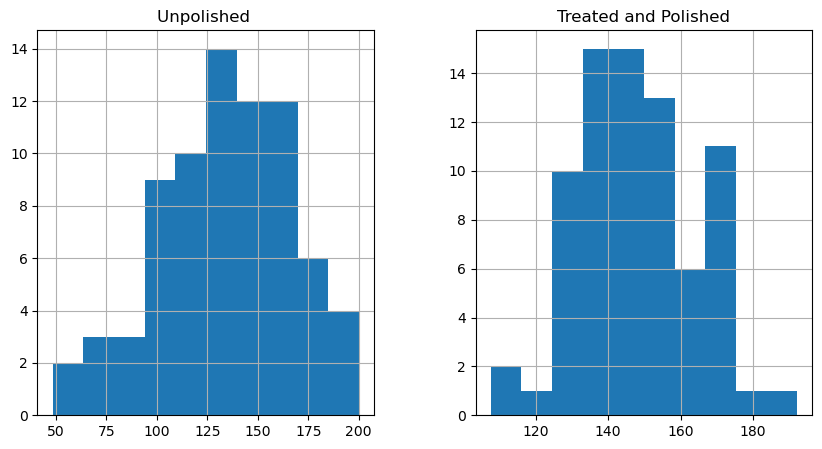

In [9]:
df.hist(figsize=(10,5))
plt.show()

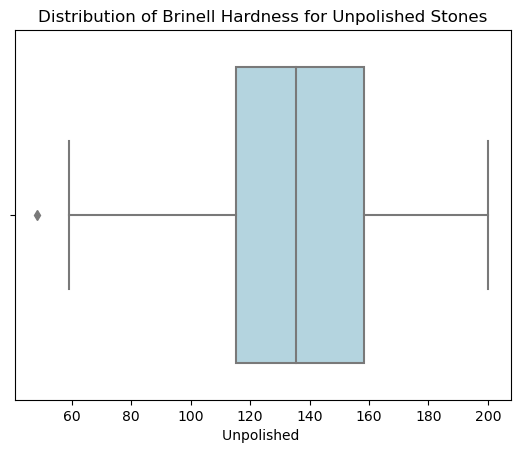

In [10]:
sns.boxplot(x= df['Unpolished '], color='lightblue')
plt.title('Distribution of Brinell Hardness for Unpolished Stones')
plt.show()

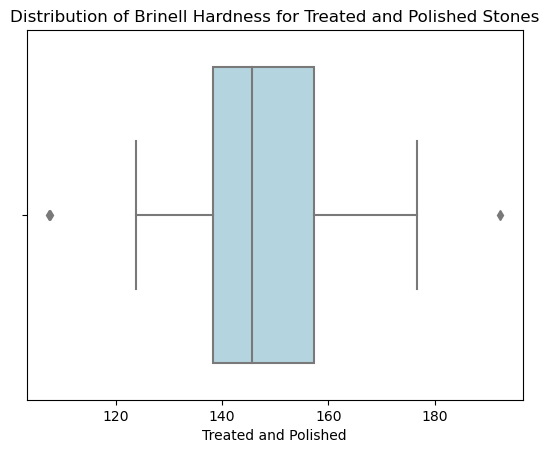

In [11]:
sns.boxplot(x= df['Treated and Polished'], color='lightblue')
plt.title('Distribution of Brinell Hardness for Treated and Polished Stones')
plt.show()

### Treating outliers

In [12]:
df['Unpolished '].describe()

count     75.000000
mean     134.110527
std       33.041804
min       48.406838
25%      115.329753
50%      135.597121
75%      158.215098
max      200.161313
Name: Unpolished , dtype: float64

###### Using IQR method to identify outliers

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['Unpolished '])
print("lower range",lr, "and upper range", ur)

lower range 51.001735124999996 and upper range 222.543115725


In [15]:
df['Unpolished ']=np.where(df['Unpolished ']>ur,ur,df['Unpolished '])
df['Unpolished ']=np.where(df['Unpolished ']<lr,lr,df['Unpolished '])

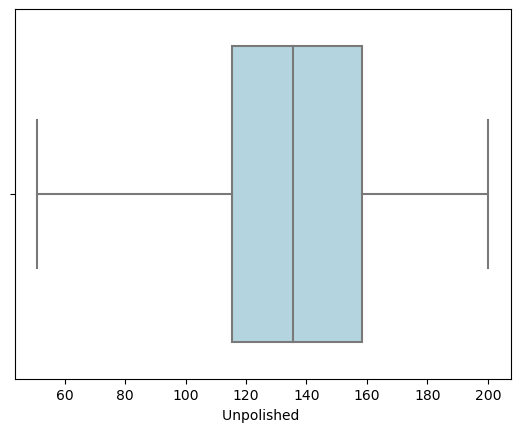

In [16]:
sns.boxplot(x= df['Unpolished '], color='lightblue')
plt.show()

#### 1.Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

To determine if Zingaro is justified in thinking that the unpolished stones may not be suitable for printing, we can perform a hypothesis test.

In one sample test, we compare the population parameter such as mean of a single sample of data collected from a single population.

### Defining null and alternative hypotheses

Null Hypothesis (𝐻0 ): The mean Brinell's hardness index of unpolished stones is greater than or equal to 150, indicating that unpolished stones are suitable for printing.
    
    𝐻0: mean(μ)>=150.

Alternate Hypothesis (𝐻𝑎): The mean hardness of the unpolished stones is less than 150.
    
    𝐻𝑎:  mean(μ)<150.

### Deciding the significance level

##### level of significance α = 0.05.

In [17]:
print("The sample size for this problem is",len(df))

The sample size for this problem is 75


### Test statistic

We do not know the population standard deviation and n = 75. So we use the t distribution and the tSTAT test statistic.

### Calculate the p - value and test statistic

In [18]:
t_statistic, p_value = ttest_1samp(df['Unpolished '], 150)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -4.166875533846615 p value: 8.276372710325264e-05 


### To reject or accept null hypothesis

In [19]:
alpha_value = 0.05 # Level of significance
print('Level of significance:' , alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 8.276372710325264e-05


##### There is significant evidence at the 5% significance level to conclude that the mean hardness of the unpolished stones is less than 150.

this is enough proof to think Zingaro is justified in thinking that the unpolished stones may not be suitable for printing.

#### 2.Is the mean hardness of the polished and unpolished stones the same?

Two sample t test (Snedecor and Cochran 1989) is used to determine if two population means are equal. A common application is to test if a new treatment or approach or process is yielding better results than the current treatment or approach or process.



#### Null and alternative hypotheses

In testing whether mean hardness of the polished and unpolished stones are the same,the null hypothesis states that the mean hardness of the polished and unpolished stones are the same, 𝜇𝐴 equals 𝜇𝐵.

The alternative hypothesis states that the mean hardness of the polished and unpolished stones are different,  𝜇𝐴 is not equal to  𝜇𝐵.

where,

𝜇𝐴=Mean of unpolished.

𝜇𝐵=Mean of Treated and Polished.

* $H_0$: $\mu{A}$ - $\mu{B}$ =      0 i.e        $\mu{A}$ = $\mu{B}$
* $H_A$: $\mu{A}$ - $\mu{B}$ $\neq$  0 i.e      $\mu{A}$ $\neq$ $\mu{B}$

#### Significance level

Here we select  𝛼= 0.05 and the population standard deviation is not known.

##### Calculate the p - value and test statistic

* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are  same.
* Use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.

* We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of scores given the two sample observations. This function returns t statistic and two-tailed p value.

* This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.

In [20]:
t_statistic, p_value  = ttest_ind(df['Unpolished '],df['Treated and Polished'])
print('tstat',t_statistic)    
print('P Value',p_value) 

tstat -3.2412275512430875
P Value 0.0014703419909888047


##### Decide to reject or accept null hypothesis

In [21]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('Reject the null hypothesis: The mean hardness of polished and unpolished stones is significantly different.')
    print('We conclude that the mean hardness of the polished and unpolished stones are different, μ_A is not equal to μ_B.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in the mean hardness of polished and unpolished stones.')
    print('We conclude that the mean hardness of the polished and unpolished stones are the same, μ_A is equal to μ_B.')

two-sample t-test p-value= 0.0014703419909888047
Reject the null hypothesis: The mean hardness of polished and unpolished stones is significantly different.
We conclude that the mean hardness of the polished and unpolished stones are different, μ_A is not equal to μ_B.


###### We conclude that the mean hardness of the polished and unpolished stones are different, μ_A is not equal to μ_B.